**The Relationship between Bank Term Subscriptions, Age and Bank Balance**

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

**Introduction**<br/>

The Bank Marketing dataset was gathered from a direct marketing campaign of a Portuguese baking institution. The bank collected information from their clients over the phone, and each client was contacted multiple times. The Bank Marketing Dataset discusses multiple characteristics of clients of a bank in hopes to predict whether they will subscribe to a term deposit. Variables in the set include age, job, education, marital status, and more.

The question our project aims to answer is: Will new clients subscribe to a bank term deposit or will new clients not subscribe to a bank term deposit? This is achieved through classification and further described below.


**Methods**<br/>
A preliminary data analysis was completed to review the information available to us to work with as well as chose the main predictors to use for the project. 

The dataset was first loaded into R from an external website and converted into a .csv file format to ensure that it can be worked with efficiently. The functions head and tail are utilized below to show snippets of the data to ensure readability. The two columns we are interested in are age and balance which are extracted using the select function.

In [52]:
temp <- tempfile()
temp2 <- tempfile()

# Load the data from source website
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"

download.file(url, temp)
unzip(zipfile = temp, exdir = temp2)
# Read the data as csv and treat the variable "y(whether client subscribe to term deposit)" as factor
bank_data <- read_csv2(file.path(temp2, "bank.csv")) %>%
    mutate(y = as_factor(y))
unlink(c(temp, temp2))
head(bank_data)
tail(bank_data)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  age = col_double(),
  job = col_character(),
  marital = col_character(),
  education = col_character(),
  default = col_character(),
  balance = col_double(),
  housing = col_character(),
  loan = col_character(),
  contact = col_character(),
  day = col_double(),
  month = col_character(),
  duration = col_double(),
  campaign = col_double(),
  pdays = col_double(),
  previous = col_double(),
  poutcome = col_character(),
  y = col_character()
)



age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [31]:
set.seed(999)

# We choose age(client age) and balance(average yearly balance of client) as the predictors of y(whether client subscribe to term deposit),
# as we believe that these two factors affects the willingness of clients on subscribing bank term deposit the most

# Extract a data frame from the original data with only the columes that we are interested: age, balance, y
bank_age_balance <- bank_data %>%
    select(age, balance, y)

# Scale age and balance
bank_age_balance <- bank_age_balance %>%
    mutate(scaled_age = scale(age, center = TRUE),
           scaled_balance = scale(balance, center = TRUE))

# Print the head and tail of bank_age_balance
head(bank_age_balance)
tail(bank_age_balance)

age,balance,y,scaled_age,scaled_balance
<dbl>,<dbl>,<fct>,"<dbl[,1]>","<dbl[,1]>"
30,1787,no,-1.0561528,0.12105847
33,4789,no,-0.7724974,1.11852057
35,1350,no,-0.5833937,-0.02414171
30,1476,no,-1.0561528,0.01772379
59,0,no,1.6858500,-0.47270062
35,747,no,-0.5833937,-0.22449803


age,balance,y,scaled_age,scaled_balance
<dbl>,<dbl>,<fct>,"<dbl[,1]>","<dbl[,1]>"
32,473,no,-0.8670492,-0.31553887
33,-333,no,-0.7724974,-0.58334515
57,-3313,no,1.4967463,-1.57349741
57,295,no,1.4967463,-0.37468219
28,1137,no,-1.2452565,-0.09491434
44,1136,no,0.2675727,-0.09524661


In [33]:
# We set our seed as 999 throughout the whole project to ensure consistency of our results
set.seed(999)

# Splitting the data into training data and testing data
bank_split <- initial_split(bank_age_balance, prop = 0.75, strata = age)  
# We choose 0.75 as the portion of training data because we will perform cross-validation later,
# so the training data set cannot be too small. However we also think that the testing on
# the accuracy of our model is important, so we believe that 0.75 is an appropriate choise.
bank_train <- training(bank_split)   
bank_test <- testing(bank_split)

# Print the head and tail of the training set
head(bank_train)
tail(bank_train)

age,balance,y,scaled_age,scaled_balance
<dbl>,<dbl>,<fct>,"<dbl[,1]>","<dbl[,1]>"
30,1787,no,-1.0561528,0.12105847
33,4789,no,-0.7724974,1.11852057
35,1350,no,-0.5833937,-0.02414171
30,1476,no,-1.0561528,0.01772379
59,0,no,1.6858500,-0.47270062
35,747,no,-0.5833937,-0.22449803


age,balance,y,scaled_age,scaled_balance
<dbl>,<dbl>,<fct>,"<dbl[,1]>","<dbl[,1]>"
32,473,no,-0.8670492,-0.31553887
33,-333,no,-0.7724974,-0.58334515
57,-3313,no,1.4967463,-1.57349741
57,295,no,1.4967463,-0.37468219
28,1137,no,-1.2452565,-0.09491434
44,1136,no,0.2675727,-0.09524661


In [4]:
# We first plot a scatterplot on age vs balance and scaled_age vs scaled_balance,
# with the factor y colored on every single points.

options(repr.plot.width = 20, repr.plot.height = 10) 
age_vs_balance_plot <- bank_train %>%
    ggplot(aes(x = age, y = balance)) +
    geom_point(aes(colour = y)) + 
    labs(x = "age", y = "yearly balance",
        colour = "subscribed term deposit yes/no") +
    theme(text = element_text(size = 20))
age_vs_balance_plot

scaled_age_vs_balance_plot <- bank_train %>%
    ggplot(aes(x = scaled_age, y = scaled_balance)) +
    geom_point(aes(colour = y)) + 
    labs(x = "age", y = "yearly balance",
        colour = "subscribed term deposit yes/no") +
    theme(text = element_text(size = 20))
scaled_age_vs_balance_plot

ERROR: Error in eval(lhs, parent, parent): object 'bank_train' not found


In [35]:
# Create a recipe of using scaled_age and scaled_balance to predict y

bank_recipe <- recipe(y ~ scaled_age + scaled_balance, data = bank_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
bank_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [38]:
# We create our K-nearest neighbour classifier with the training set.
# Here we first randomly choose K=10 and run the process to make sure
# nothing is broken; we will perform cross-validation later and choose
# a better K value.

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) %>%
    set_engine("kknn") %>%
    set_mode("classification")

bank_fit <- workflow() %>%
    add_recipe(bank_recipe) %>%
    add_model(knn_spec) %>%
    fit(data = bank_train)

bank_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~10, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1149764
Best kernel: rectangular
Best k: 10

In [41]:
# We predict y for the testing set using our model of K=10
bank_test_predictions <- predict(bank_fit, bank_test) %>%
    bind_cols(bank_test)
head(bank_test_predictions)

# We calculate the accuracy of the model K=10, and the accuracy is 88.2%
bank_prediction_accuracy <- bank_test_predictions %>%
    metrics(truth = y, estimate = .pred_class)
bank_prediction_accuracy

.pred_class,age,balance,y,scaled_age,scaled_balance
<fct>,<dbl>,<dbl>,<fct>,"<dbl[,1]>","<dbl[,1]>"
no,39,147,no,-0.2051864,-0.4238575
no,43,-88,no,0.1730208,-0.5019400
no,36,1109,no,-0.4888419,-0.1042178
no,37,2317,no,-0.3942901,0.2971594
no,25,-221,no,-1.5289119,-0.5461314
no,31,132,no,-0.9616010,-0.4288415


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.88219663
kap,binary,0.02084081


In [55]:
# We would like to choose a better K value for our K-neighbour classification model,
# so we perform the cross-validation method on our training set.
# We choose to perform 5-fold cross-validation because 10-fold is too time consuming.
bank_vfold <- vfold_cv(bank_train, v = 5, strata = y)

# Instead of specifying a specific K value we insert tune() to keep it as a changing parameter
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")
knn_tune

# Here we perform the workflow again with cross-validation method to calculate an accuracy for
# each K value in a reasonable range, and we pick the K value that gives best accuracy
knn_results <- workflow() %>%
      add_recipe(bank_recipe) %>%
      add_model(knn_tune) %>%
      tune_grid(resamples = bank_vfold, grid = 10) %>%
      collect_metrics()
head(knn_results)

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.8054395,5,0.007467303,Model1
2,roc_auc,binary,0.5363620,5,0.010024752,Model1
3,accuracy,binary,0.8576058,5,0.001005625,Model2
3,roc_auc,binary,0.5417167,5,0.014828621,Model2
4,accuracy,binary,0.8567205,5,0.002073287,Model3
4,roc_auc,binary,0.5368334,5,0.015838689,Model3


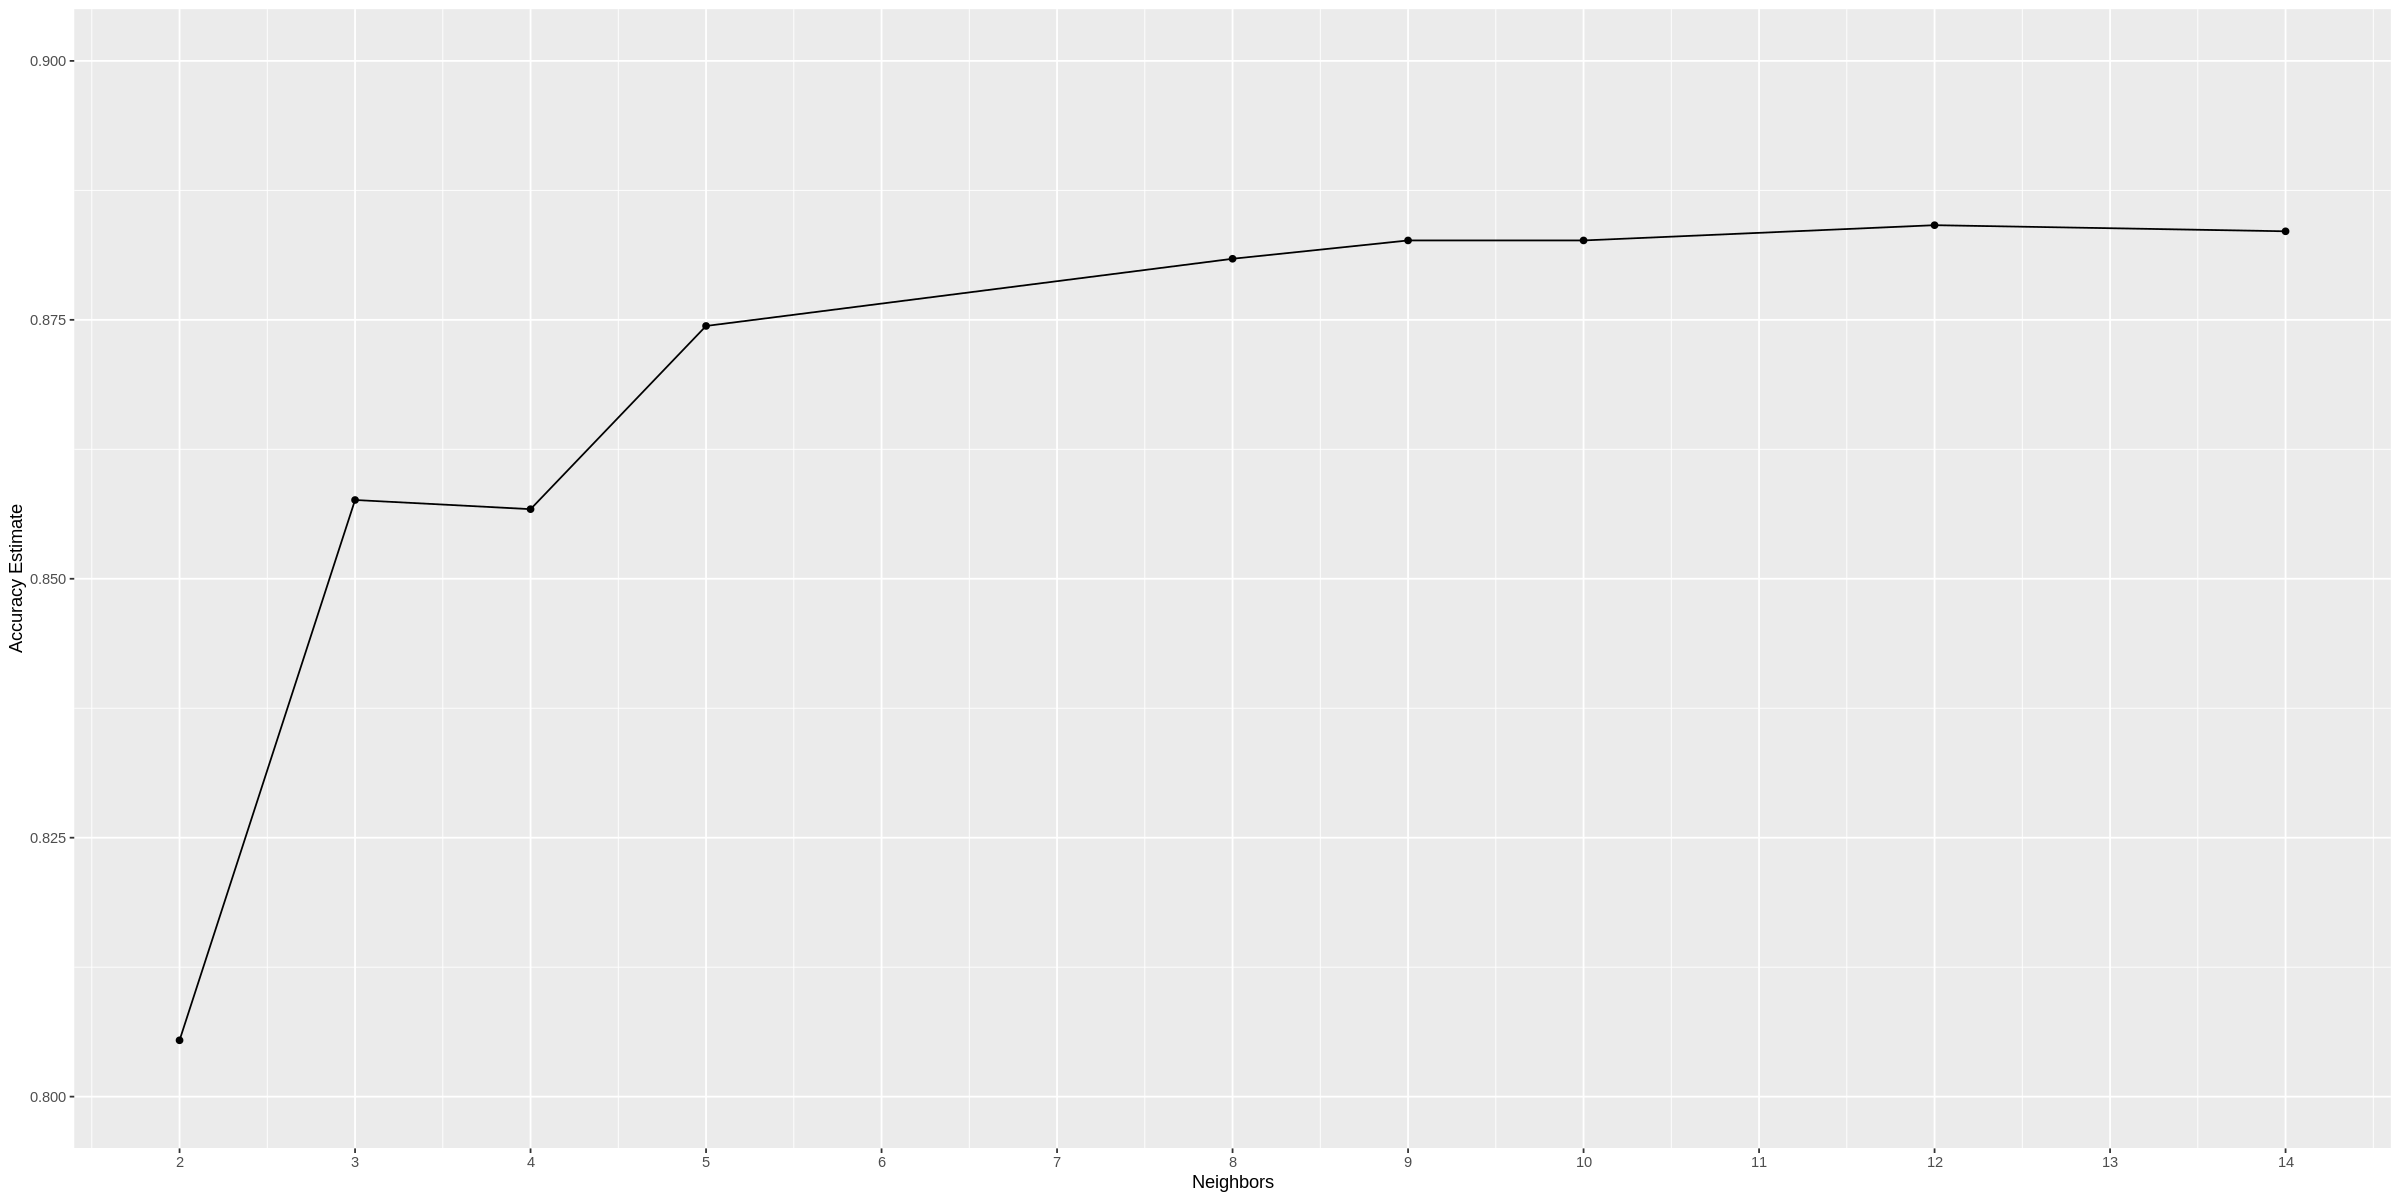

In [54]:
# Filter the accuracy from the .metric column
accuracies <- knn_results %>% 
      filter(.metric=="accuracy")

# Create a plot using the accuracies dataset with K value on the x-axis and estimated accuracy on the y-axis
options(repr.plot.width = 20, repr.plot.height = 10) 
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.8, 0.9)) # adjusting the y-axis

accuracy_versus_k

In [56]:
# From the graph above, K=12 gives the best accuracy, so we perform the whole K-neighbours classification process with K=12

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) %>%
    set_engine("kknn") %>%
    set_mode("classification")

bank_fit <- workflow() %>%
    add_recipe(bank_recipe) %>%
    add_model(knn_spec) %>%
    fit(data = bank_train)

bank_test_predictions <- predict(bank_fit, bank_test) %>%
    bind_cols(bank_test)
head(bank_test_predictions)

bank_prediction_accuracy <- bank_test_predictions %>%
    metrics(truth = y, estimate = .pred_class)
bank_prediction_accuracy

# From bank_prediction_accuracy, our model of using age and balance to predict y have accuracy of 88.4%

.pred_class,age,balance,y,scaled_age,scaled_balance
<fct>,<dbl>,<dbl>,<fct>,"<dbl[,1]>","<dbl[,1]>"
no,39,147,no,-0.2051864,-0.4238575
no,43,-88,no,0.1730208,-0.5019400
no,36,1109,no,-0.4888419,-0.1042178
no,37,2317,no,-0.3942901,0.2971594
no,25,-221,no,-1.5289119,-0.5461314
no,31,132,no,-0.9616010,-0.4288415


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.88396811
kap,binary,0.01330282


For our project we intend to plot multiple different variables in order to determine which variables are best suited to determine if someone will subscribe to a bank term deposit. The best variables will be chosen based on the relationship demonstrated on the graph. For instance, if there is a strong positive relationship on the plot then that would signify that the variable is a strong indicator of whether or not someone will subscribe to a bank term deposit. On the other hand, if there is a weak or negative relationship, then that would indicate that the variable is not suitable to determine whether or not someone will subscribe to a bank term deposit.

**Expected Outcomes & Significance**\
----What do you expect to find\
--------Use the variables we chose to predict whether a client will subscribe to a term deposit, and therefore find which variable influenced the will of a client on subscribing a term deposit the most. After finishing the model we will check our predictions with the real data to see how accurate our predictions are.\
----What impact will your findings have\
--------We can use this data to predict groups who are more interested in the bank promotion. So we can target them when the bank decides to do marketing strategy.\
----What future questions could this lead to\
--------Are there any other predicates to add for choosing the strategy?\
--------Some of predicates will disturb this data results\
--------How do different variables intersect with one another to impact whether or not someone will subscribe to a bank deposit\
--------Is there a better model to predict this data?